In [1]:
!pip install NumPy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install Keras

In [22]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras.optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model

In [23]:
#Getting the data set
df = pd.read_csv("MSFT.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [24]:
#Print the shape of Dataframe  
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (9083, 6)


<Axes: xlabel='Date'>

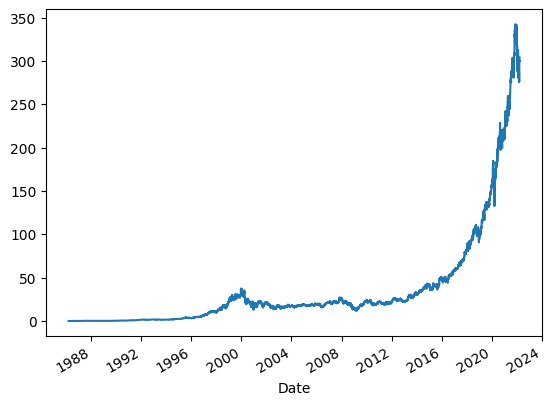

In [25]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [51]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)


In [52]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [54]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


In [55]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [56]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=25, batch_size=10, verbose=1, shuffle=False)

Epoch 1/25
826/826 [==============================] - 4s 2ms/step - loss: 108.2185
Epoch 2/25
826/826 [==============================] - 1s 2ms/step - loss: 230.1318
Epoch 3/25
826/826 [==============================] - 1s 2ms/step - loss: 166.0624
Epoch 4/25
826/826 [==============================] - 1s 2ms/step - loss: 111.1038
Epoch 5/25
826/826 [==============================] - 1s 2ms/step - loss: 70.4700
Epoch 6/25
826/826 [==============================] - 1s 2ms/step - loss: 39.4920
Epoch 7/25
826/826 [==============================] - 1s 2ms/step - loss: 19.0244
Epoch 8/25
826/826 [==============================] - 1s 2ms/step - loss: 8.2551
Epoch 9/25
826/826 [==============================] - 1s 2ms/step - loss: 4.0360
Epoch 10/25
826/826 [==============================] - 1s 2ms/step - loss: 2.6211
Epoch 11/25
826/826 [==============================] - 1s 2ms/step - loss: 1.9981
Epoch 12/25
826/826 [==============================] - 1s 2ms/step - loss: 1.6152
Epoch 13/25
82

In [58]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

26/26 [==============================] - 0s 1ms/step


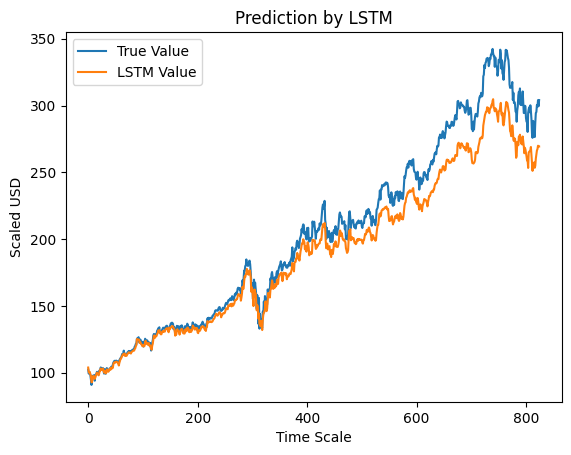

In [59]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()